# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения

In [1]:
from scipy.stats import norm

delta = 3
sigma_squared = 225
confidence_level=0.95
significance_level = 1 - confidence_level
Z = norm.ppf(1-significance_level/2, loc=0, scale=1)

n = round((Z*sigma_squared**(1/2)/delta)**2)  #Запишите в эту переменную ваш высчитанный ответ!
print(n)

96


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

$$ \Delta = \frac{Z*\sigma}{\sqrt{n}}$$

In [2]:
confidence_level = 0.98
n = 25
x_mean = 130
sigma = 15
significance_level = 1 - confidence_level
Z = norm.ppf(1-significance_level/2, loc=0, scale=1)

L = 2*round(Z*sigma/(n**(1/2)))  #Запишите в эту переменную ваш высчитанный ответ!
print(L)

14


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [11]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

men  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
women = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

t, p = stats.ttest_ind(men, women)
t, p

(2.2147585728477095, 0.026777388594543594)

### Ответ:
p-value (второе значение) больше фиксированного уровня значимости α, на котором мы проверяем гипотезу, следовательно, нулевую гипотезу мы не можем отвергнуть. Скорее всего, различие между выборками незначительно.

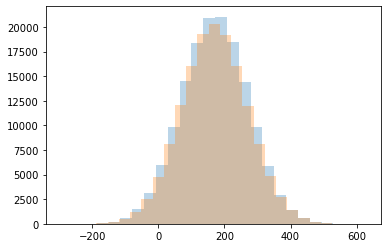

In [4]:
plt.hist(men, bins=25, alpha=0.3);
plt.hist(women, bins=25, alpha=0.3);

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$

In [6]:
delta = 50
sigma = 150
confidence_level=0.95
significance_level = 1 - confidence_level
Z = norm.ppf(1-significance_level/2, loc=0, scale=1)

n = round((Z*sigma/delta)**2)
print(n)

35


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [7]:
import pandas as pd  # для работы с таблицами

observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [8]:
import scipy.stats as stats
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations)#Возможно пригодится эта функция.
oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

### Ответ
Точный критерий Фишера дал p выше уровня значимости, следовательно, следует принять гипотезу, что ответы волшебника случайны.

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [68]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

def mean_confidence_interval(data, confidence=0.90):
    average = np.mean(data)      
    delta = stats.sem(data) * stats.norm.ppf((1 + confidence) / 2) / len(data)**(1/2)
    return round(average-delta, 2), round(average+delta, 2)

print(mean_confidence_interval(data, 0.90))

(6.54, 6.72)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [13]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
 

t, p = stats.ttest_ind(A, B)
t, p

(11.865233896372924, 4.623319592204015e-25)

С уровнем значимости в 0.01 мы можем сказатЬ, что это разные выборки с разным мат. ожиданием.

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [ ]:
### Ваши выводы:

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test